In [ ]:
%matplotlib notebook 
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [ ]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        self.t = t

        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id

        self.MomentumVec = np.zeros( (len(t), len(v0)) )
        self.KeVec = np.zeros( (len(t), 1) )
        self.PeVec = np.zeros( (len(t), 1) )

        self.Pe = 0

        self.Force = self.m *self.a
        self.K = 100
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i, self.m *self.v)


        self.SetKE(i, self.GetKineticEnergy())
        self.SetPE(i, self.GetPEnergy())

        self.a = self.Force/self.m
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a

    def CheckWallLimits(self, limits, dim = 2):
      for i in range(dim):
        if self.r[i] + self.radius > limits [i] and self.v[i] >0:
          self.v[i] = -self.v[i]              
        if self.r[i] - self.radius < -limits[i] and self.v[i]<0:
          self.v[i] = -self.v[i]

    #Se crea un método que vaya reiniciando la Fuerza y aceleración para cada punto de nuestra discretización

    def ResetForce(self):
      self.Force[:] = 0
      self.a[:] = 0
      self.Pe = 0
      
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v

    def SetMomentum(self, i, p):
        self.MomentumVec[i] = p
    
    def SetKE(self, i, KE):
        self.KeVec[i] = KE

    def SetPE(self, i, PE):
        self.PeVec[i] = PE
    
    #Se calcula la fuerza que ejerce una bola sobre otra con los parámetros a mostrar
    def GetForce(self, p): 
      #Primero miro la distancia entre una partícula y otra

        d = np.linalg.norm( self.r - p.GetPosition() )

        compression_particles = self.radius + p.GetR() - d #Defino la compresión entre partículas

      # Las partículas entran en contacto, calculo la fuerza                                              
        if compression_particles > 0:

            Normal_force = self.K * compression_particles**3 / d
            self.Force = np.add(self.Force, Normal_force*(self.r - p.GetPosition()))
            self.Pe += self.K*compression_particles**4 / 4

        
    # Getters 

    def GetPosition(self):
        return self.r

    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetRVelocityVector(self):
        return self.RvVector

    def GetVelocityVector(self):
        return self.vVector

    def GetMomentumVec(self):
        return self.MomentumVec
    
    def GetKineticEnergy(self):
        return 0.5*self.m *np.linalg.norm(self.v)**2

    def GetPEnergy(self):
        return 0.5*self.Pe /2

    def GetTotalForce(self):
        return self.Force
    
    def GetR(self):
        return self.radius

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # Vector de velocidad reducido
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [ ]:
dt = 0.0001
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [ ]:
def GetParticles(NParticles,Limit,Velocity,Dim=2,dt=0.0001):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        #Se ponen las condiciones iniciales de posición, velocidad y aceleración

        if i == 0:
            x0 = np.array([-10.,0.])
            v0 = np.array([20., 0.])
            a0 = np.array([0., 0.])

        elif i == 1:
            x0 = np.array([0., -1.6])
            v0 = np.array([0., 0.])
            a0 = np.array([0., 0.])

        elif i == 2:
            x0 = np.array([-15.,-15.])
            v0 = np.array([0., 0.])
            a0 = np.array([0., 0.])


        
        p = Particle(x0,v0,a0,t,1.,2.,i) #Se modela como partículas de masa m=1 y radio r=2
        
        Particles_.append(p)
        
    return Particles_

In [ ]:
Limits = np.array([20.,20.])

In [ ]:
def RunSimulation(t, NParticles, Velocity ):

    Particles = GetParticles(NParticles, Limits[1], Velocity = Velocity, dt = dt)

    for it in tqdm(range(len(t))):
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].GetForce(Particles[j])
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].CheckWallLimits(Limits)

    return Particles

In [ ]:
Particles = RunSimulation(t, 3, Velocity =5)

100%|██████████| 100001/100001 [00:25<00:00, 3958.57it/s]


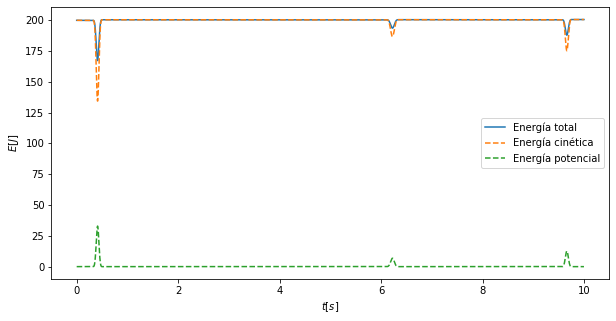

In [ ]:
KEnergy = Particles[0].KeVec
PEnergy = Particles[0].PeVec
T_Energy = Particles[0].KeVec + Particles[0].PeVec

for i in range(1, len(Particles)):
    KEnergy = np.add(KEnergy, Particles[i].KeVec)
    PEnergy = np.add(PEnergy, Particles[i].PeVec)
    T_Energy = np.add(T_Energy, Particles[i].KeVec + Particles[i].PeVec)

Momentum = Particles[0].GetMomentumVec()

for i in range(1, len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVec() )

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(t, T_Energy, "-", label = "Energía total")
ax.plot(t, KEnergy, "--", label = "Energía cinética")
ax.plot(t, PEnergy,"--", label = "Energía potencial")
ax.set_xlabel("$t[s]$")
ax.set_ylabel("$E[J]$")
plt.legend(loc = 0)



In [ ]:
def ReduceTime(t,factor):
    
    for p in Particles:
        
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

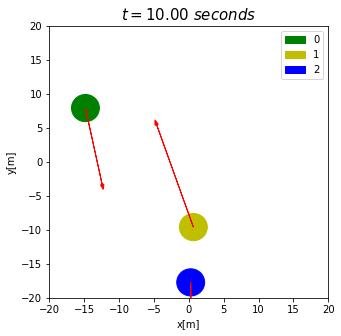

In [ ]:
redt = ReduceTime(t,1000)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    j= 0
    colors = ["green", "y", "b"]
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetRVelocityVector()[i,0]
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color= colors[j], fill=True, label = str(j) )
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        j+=1
    plt.xlabel("x[m]")
    plt.ylabel("y[m]")
    plt.legend()    
    return plot
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

A.)El signficado físico de K se puede entender como la cantidad de Fuerza que se debe aplicar para deformar un metro cúbico. \\
B.)Basado en la gráfica la energía no es totalmente conservativa, esto puede deberse a que se está usando un método de Euler, el cual no es lo suficientemente estable ni convergente. Si se mejora el método sí se podría apreciar con mejor claridad la conservación de la Energía.